# Trainer Computer Vision
---

## **Module 3 - Step 2**

Objective : 
- Getting used to local python notebook environment (jupyter/jupyter-lab, vscode, etc...)
- Creating model case of multi-class classification with > 3 classes
- Creating model to classify colors

### Import Library

In [1]:
import tensorflow as tf
import utilities_modul as util
import matplotlib.pyplot as plt
import json

### Read Credential

In [2]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [6]:
base_dir = "./training_dataset"

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split = 0.2,
    fill_mode= 'wrap',

)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split = 0.2,
    fill_mode= 'wrap',
)

In [8]:
img_shape = (200, 200, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=20,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='categorical',
    batch_size=5,
    subset='validation')

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [9]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=img_shape, strides=(2,2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

### Model Training

In [12]:
# Cek Available RAM terlebih dahulu
!free -h

              total        used        free      shared  buff/cache   available
Mem:           3,9G        2,5G        202M         39M        1,2G        1,2G
Swap:          1,9G        1,2G        715M


In [13]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

[sudo] password for trainercv: 

In [14]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.90):
      print("\nReached 90% Validation Accuracy, Stop training")
      self.model.stop_training = True

acc_callback = stopTraining()

In [15]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 10, 
                      validation_data = validation_generator, 
                      verbose = 1,
                      callbacks= [acc_callback])

Epoch 1/10
10/10 [==============================] - 37s 1s/step - loss: 2.0998 - accuracy: 0.2026 - val_loss: 1.3327 - val_accuracy: 0.4800
Epoch 2/10
10/10 [==============================] - 8s 790ms/step - loss: 1.3370 - accuracy: 0.4416 - val_loss: 0.8770 - val_accuracy: 0.7200
Epoch 3/10
10/10 [==============================] - 8s 793ms/step - loss: 0.6437 - accuracy: 0.7496 - val_loss: 0.5293 - val_accuracy: 0.7600
Epoch 4/10
10/10 [==============================] - 8s 784ms/step - loss: 0.4111 - accuracy: 0.8434 - val_loss: 0.6765 - val_accuracy: 0.7600
Epoch 5/10
10/10 [==============================] - 8s 785ms/step - loss: 0.3660 - accuracy: 0.8697 - val_loss: 0.6192 - val_accuracy: 0.7000
Epoch 6/10
10/10 [==============================] - 8s 777ms/step - loss: 0.3887 - accuracy: 0.8429 - val_loss: 0.6013 - val_accuracy: 0.7600
Epoch 7/10
10/10 [==============================] - 8s 776ms/step - loss: 0.4810 - accuracy: 0.8091 - val_loss: 0.4985 - val_accuracy: 0.8600
Epoch 8/

### Model Evaluation

In [16]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]*100}%\nLoss test = {stats[0]*100}%')

10/10 [==============================] - 2s 140ms/step - loss: 0.3066 - accuracy: 0.9400
Accuracy test = 93.99999976158142%
Loss test = 30.65865933895111%


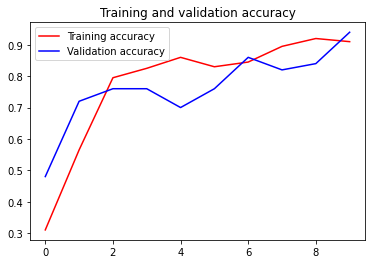

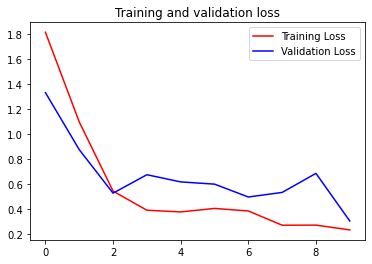

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
validation_generator.class_indices

{'black': 0,
 'blue': 1,
 'brown': 2,
 'green': 3,
 'grey': 4,
 'orange': 5,
 'red': 6,
 'violet': 7,
 'white': 8,
 'yellow': 9}

### Model Saving

In [19]:
model.save('model_module-3.h5')

### Grading

In [20]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
util.give_grading(usermail=usermail, steps=2, optionalParam=stats)

[!] Grading success, please check the TrainerCV Portal
